<a href="https://colab.research.google.com/github/tharma3/AnEx_Presentation/blob/main/2025_AnEx_OpenSourceAPIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Introduction to the Open Data API Using Python
## Prepared by Martha Norrick, martha@marthanorrick.com

### What We'll Cover

There is a ton of open source data available on the internet.  This session will go through how to use the City's OpenData API to pull down data, do some basic analysis and build a map of your data using replicable code.

I'm assuming if you're in this session, you already know at least a little bit about using Python for data science, including importing packages, loading and handling Pandas dataframes, and basic SQL like queries.  If I'm moving too fast, holler and I can slow down!  But there's a lot to cover so let's get started.

### What's an API?

First off, I'm not a computer scientist.  But API stands for Application Programming Interface, which is basically how computers or computer programs can communicate with each other.  For our purposes, we're writing a computer program to interact with a database application and ask it nicely to send us back data.  For a more nuanced understanding of APIs, ask your friendly neighborhood computer scientist or engineer!

Most APIs require you to authenticate, e.g. tell the application who you are, in order to access the data or application.  Usually that takes the form of an API key.  It's important to keep your API keys private--if you publish them on the internet, they may end up being misused by others or subject you to rate limits or if it's an API that charges per call, you can end up with a very nasty surprise.  We'll talk about setting environment variables or reading in our credentials from a local file so as to protect our API keys!

The upside of using an API is that it can save some time clicking on stuff, and also make it easier to share replicable analysis with others without having to also share data files.  The downside is that it can be easy to pull data without really understanding it.  

With that, let's get started by importing the packages we'll need.

In [29]:
!pip install geopandas #this installs geopandas, the geospatial python package
!pip install fiona #a package dependency for geopandas
!pip install sodapy
import pandas as pd # imports pandas, the most frequently used package for working with tables in python
from sodapy import Socrata
import os # imports os, which we'll use to navigate file paths and use environment variables.
import numpy as np # import numpy
import geopandas as gpd #importing geopandas
import fiona #importing fiona
import matplotlib.pyplot as plt #importing matplotlit pyplot for visualization

In exciting news, the OpenData API has recently had an [upgrade](https://support.socrata.com/hc/en-us/articles/34730618169623-SODA3-API)!  The old endpoints will continue to work if you have legacy code but the new endpoints will be the default on the OpenData site.  The new API endpoints do require authentication, which used to be optional. From reading the platform documentation, it seems that we all have AI scrapers to thank for this, so please direct any upset towards OpenAI and not towards the NYC OpenData team.  But this is a good opportunity to learn about how to handle authentication via environment variables!

To get a free credential to use the API, follow [these](https://support.socrata.com/hc/en-us/articles/210138558-Generating-App-Tokens-and-API-Keys) directions.  Once you've created your app token, you're going to save it in a special file called an environment file in order to use it in our project.

Environment variables are similar to Python variables, except instead of explictly writing the value into the program, we explictly write the value in a file called an environment file (.env) that our program will look to to find the value of the key.

An environment file is very straightforward.  Using a text editor, make a blank file and save it with the filename and extension as follows (no quotes): vars.env.  The file should look like this:

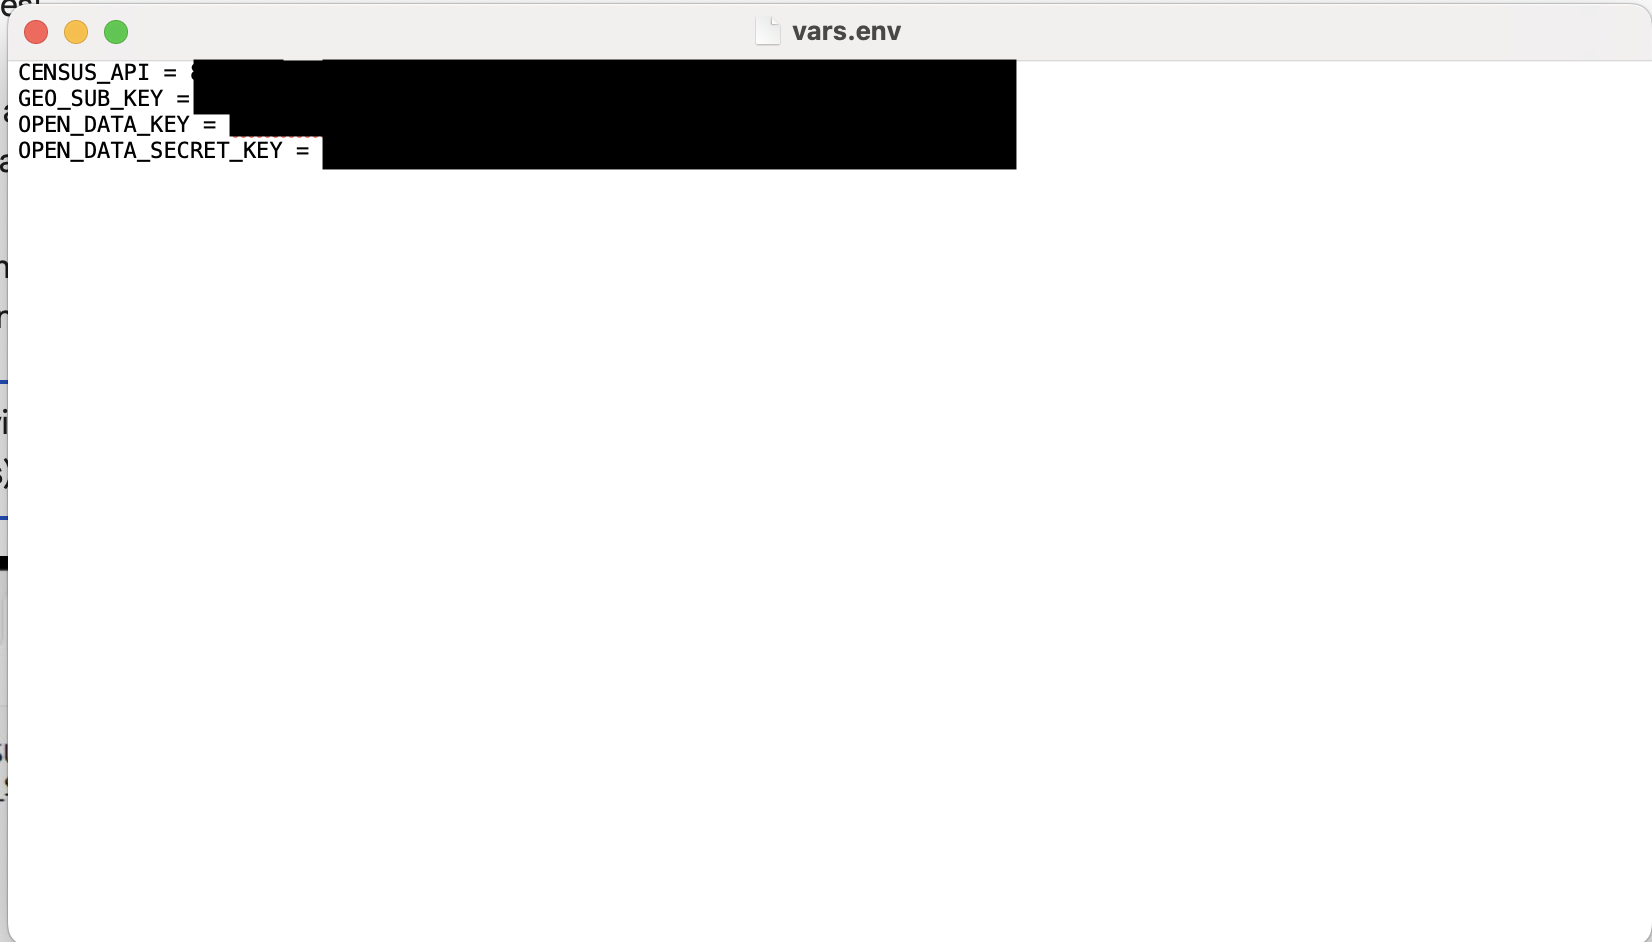

In [3]:
#package to handle environment variables in colab
!pip install colab-env -qU
import colab_env

  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.16.0 requires python-dotenv<2.0.0,>=1.0.0, but you have python-dotenv 0.21.1 which is incompatible.
Mounted at /content/gdrive


In [4]:
#load your environment variables! Don't put your passwords in directly!
from dotenv import load_dotenv
load_dotenv()
MyAppToken = os.getenv("OPEN_DATA_APP_TOKEN")


### Open Data API

A personal favorite, if you work with Open Data and find yourself downloading data frequently, there's an easier way!  Let's go look at Open Data!

Every Open Data set has an ID that you can reference to pull the Open Data set directly.  You can even filter or use SQL-like queries to target just the data you need instead of having to pull an entire large dataset and load it into memory.

In [5]:
#Example authenticated client (needed for non-public datasets):
client = Socrata('data.cityofnewyork.us',
                 MyAppToken)

In [6]:
#we snag the URL from the Open Data Website, as a CSV or a JSON!
dog_licenses_url = 'https://data.cityofnewyork.us/api/v3/views/nu7n-tubp/query.csv'

In [7]:
#read in the url using the authenticated client
dog_licenses = pd.DataFrame(client.get("nu7n-tubp", limit=1000000)) # default limit is 1000

In [8]:
#let's take a look at size of the data!
dog_licenses.shape

(722864, 8)

In [9]:
#how good is the coverage in each column?
dog_licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722864 entries, 0 to 722863
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   animalname          722864 non-null  object
 1   animalgender        722843 non-null  object
 2   animalbirth         722864 non-null  object
 3   breedname           722864 non-null  object
 4   zipcode             722855 non-null  object
 5   licenseissueddate   722864 non-null  object
 6   licenseexpireddate  722782 non-null  object
 7   extract_year        722864 non-null  object
dtypes: object(8)
memory usage: 44.1+ MB


In [11]:
#let's take a look at the data!
dog_licenses.head()

,animalname,animalgender,animalbirth,breedname,zipcode,licenseissueddate,licenseexpireddate,extract_year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035,2014-09-12T00:00:00.000,2017-09-12T00:00:00.000,2016
1,YOGI,M,2010,Boxer,10465,2014-09-12T00:00:00.000,2017-10-02T00:00:00.000,2016
2,ALI,M,2014,Basenji,10013,2014-09-12T00:00:00.000,2019-09-12T00:00:00.000,2016
3,QUEEN,F,2013,Akita Crossbreed,10013,2014-09-12T00:00:00.000,2017-09-12T00:00:00.000,2016
4,LOLA,F,2009,Maltese,10028,2014-09-12T00:00:00.000,2017-10-09T00:00:00.000,2016


In [12]:
#Let's take a look at the most frequent breeds!
dog_licenses.groupby('breedname')['animalname'].count().sort_values(ascending=False).head(10)

,animalname
breedname,
Unknown,63558
Yorkshire Terrier,40224
Shih Tzu,37108
Chihuahua,28086
Labrador Retriever,21852
Maltese,20858
Labrador Retriever Crossbreed,19334
American Pit Bull Mix / Pit Bull Mix,17271
Shih Tzu Crossbreed,14549


Let's say we just want to examine the phenomenon of the Yorkshire Terrier.

In [13]:
#filter rows to where Breed Name = Yorkshire Terrier.  To filter down a Pandas dataframe, we use
yorkies = dog_licenses[dog_licenses['breedname'] == 'Yorkshire Terrier']

In [38]:
#you can also apply the filter directly to the API!
yorkies_api = pd.DataFrame(client.get("nu7n-tubp", breedname="Yorkshire Terrier", limit=100000))

In [14]:
#let's take a look!
yorkies.head()

,animalname,animalgender,animalbirth,breedname,zipcode,licenseissueddate,licenseexpireddate,extract_year
11,LEMMY,F,2005,Yorkshire Terrier,10003,2014-09-13T00:00:00.000,2017-10-26T00:00:00.000,2016
36,SHERRIE,M,2008,Yorkshire Terrier,11224,2014-09-14T00:00:00.000,2017-10-06T00:00:00.000,2016
65,ROCKY,M,2012,Yorkshire Terrier,10451,2014-09-15T00:00:00.000,2017-10-09T00:00:00.000,2016
100,BELLA,F,2012,Yorkshire Terrier,10013,2014-09-17T00:00:00.000,2019-09-17T00:00:00.000,2016
152,MIA,F,2011,Yorkshire Terrier,11222,2014-09-22T00:00:00.000,2016-10-10T00:00:00.000,2016


In [39]:
#let's compare to the API direct filter
yorkies_api.head()

,animalname,animalgender,animalbirth,breedname,zipcode,licenseissueddate,licenseexpireddate,extract_year
0,LEMMY,F,2005,Yorkshire Terrier,10003,2014-09-13T00:00:00.000,2017-10-26T00:00:00.000,2016
1,SHERRIE,M,2008,Yorkshire Terrier,11224,2014-09-14T00:00:00.000,2017-10-06T00:00:00.000,2016
2,ROCKY,M,2012,Yorkshire Terrier,10451,2014-09-15T00:00:00.000,2017-10-09T00:00:00.000,2016
3,BELLA,F,2012,Yorkshire Terrier,10013,2014-09-17T00:00:00.000,2019-09-17T00:00:00.000,2016
4,MIA,F,2011,Yorkshire Terrier,11222,2014-09-22T00:00:00.000,2016-10-10T00:00:00.000,2016


In [15]:
#let's group to see what the most popular names are for Yorkie?
yorkies.groupby('animalname')['extract_year'].count().reset_index().sort_values('extract_year', ascending=False).head(10)

,animalname,extract_year
3383,NAME NOT PROVIDED,1120
379,BELLA,749
5016,UNKNOWN,640
1033,COCO,563
3026,MAX,545
4127,ROCKY,399
3914,PRINCE,343
3916,PRINCESS,339
5247,YORKIE,337
3129,MIA,328


In [16]:
#what is the share of dogs that are Yorkshire Terriers for each year?
dog_licenses_by_year = dog_licenses.groupby('extract_year')['breedname'].value_counts(normalize=True).reset_index()

In [17]:
#yorkie share by year
dog_licenses_by_year[dog_licenses_by_year['breedname'] == 'Yorkshire Terrier']

,extract_year,breedname,proportion
1,2016,Yorkshire Terrier,0.064206
306,2017,Yorkshire Terrier,0.064331
604,2018,Yorkshire Terrier,0.062137
910,2022,Yorkshire Terrier,0.055099
2475,2023,Yorkshire Terrier,0.047390
2821,2024,Yorkshire Terrier,0.045870


In [18]:
#which zip codes have the highest share of yorkshire terriers?
dog_licenses_by_zip = dog_licenses.groupby('zipcode')['breedname'].value_counts(normalize=True).reset_index()

In [19]:
#filter down to yorkshire terriers
dog_licenses_by_zip_yorkies_only = dog_licenses_by_zip[dog_licenses_by_zip['breedname'] == 'Yorkshire Terrier']

In [20]:
#let's take a look at that dataframe
dog_licenses_by_zip_yorkies_only.head()

,zipcode,breedname,proportion
6,10001,Yorkshire Terrier,0.030453
211,10002,Yorkshire Terrier,0.058436
435,10003,Yorkshire Terrier,0.026476
691,10004,Yorkshire Terrier,0.027228
800,10005,Yorkshire Terrier,0.024415


In [21]:
#grab the ZCTA file
#read in the GeoJSON file of ZCTAs from Open Data using Geopandas (gpd.read_file)
nyc_zcta = gpd.read_file('https://data.cityofnewyork.us/resource/pri4-ifjk.geojson')

In [22]:
#let's take a look at the ZCTAs
nyc_zcta.shape

(178, 5)

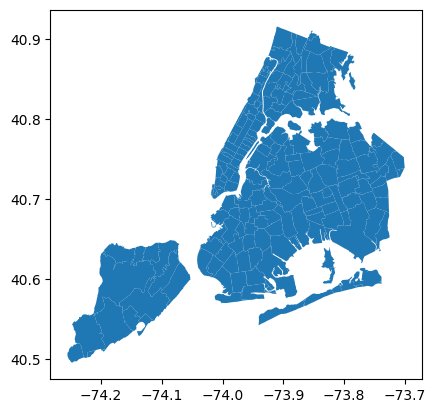

In [23]:
#let's take a look!
nyc_zcta.plot();

In [24]:
#let's take a look at the data
nyc_zcta.head()

,modzcta,label,zcta,pop_est,geometry
0,10001,"10001, 10118","10001, 10119, 10199",23072,"MULTIPOLYGON (((-73.98774 40.74407, -73.98819 ..."
1,10002,10002,10002,74993,"MULTIPOLYGON (((-73.9975 40.71407, -73.99709 4..."
2,10003,10003,10003,54682,"MULTIPOLYGON (((-73.98864 40.72293, -73.98876 ..."
3,10026,10026,10026,39363,"MULTIPOLYGON (((-73.96201 40.80551, -73.96007 ..."
4,10004,10004,10004,3028,"MULTIPOLYGON (((-74.00827 40.70772, -74.00937 ..."


In [25]:
#let's merge together the information we got from the Dog Licensing data with the ZCTA shapefile using the ZCTA.
yorkie_share_by_zcta = pd.merge(left=nyc_zcta, right=dog_licenses_by_zip_yorkies_only, left_on='modzcta', right_on='zipcode' ,how='inner')

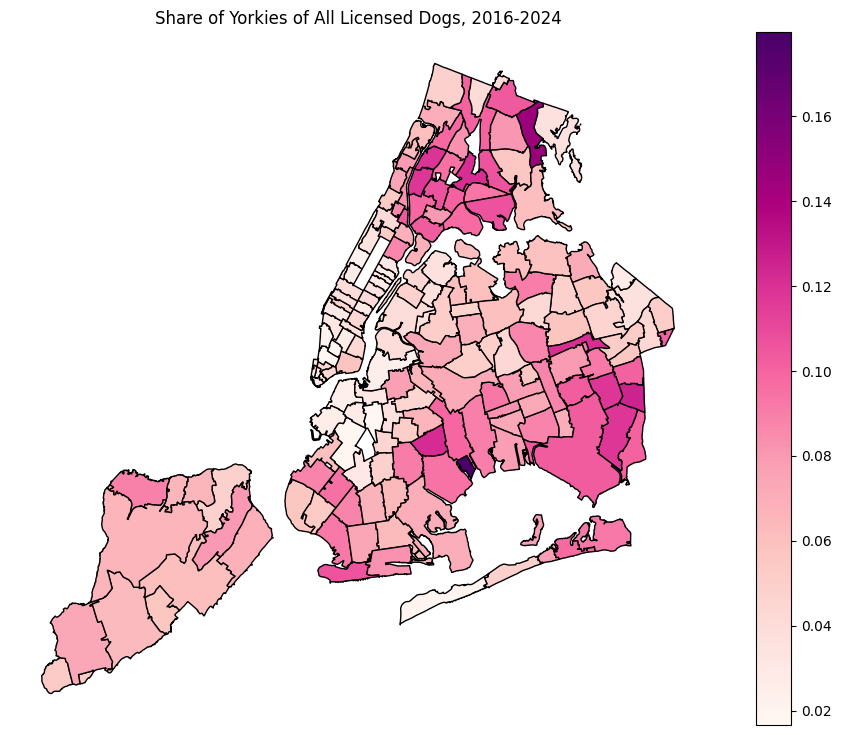

In [28]:
#let's put it together on a map!

fig, ax = plt.subplots(figsize=(13,9)) #make the figure and set the size
ax.set_aspect('equal') #make it a square
ax.axis('off') #turn off the lat/long boxes on the top and side
plt.title("Share of Yorkies of All Licensed Dogs, 2016-2024") #always give your plot a title!
yorkie_share_by_zcta.plot(ax=ax, cmap='RdPu', column='proportion', edgecolor='black', lw=1, legend=True) #make a map!
plt.show(); #show your work!

### Debrief!

There are so many [Open APIs](https://github.com/public-apis/public-apis#government) out there!  Personal favorite: Wegmans has a public API!